# Classification Model Evaluation

In [156]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

## Model Selection Process

### Data Cleaning and Preparation

In [157]:
# Read data
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [158]:
# Dimensions of the data set
print(diabetes.shape)

(768, 9)


In [159]:
# Remove unusual rows of data
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

# Dimensions of data set after cleansing
print(diabetes_mod.shape)

(724, 9)


### Feature Selection

In [160]:
# Features/Response
feature_names = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

### Model Selection

In [161]:
logreg = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

## Model Evaluation Procedures

### 01. Train/Test Split

In [162]:
#YOUR CODE

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Train the model and predict output from test set
y_pred = logreg.fit(X_train, y_train)
#Determine accuracy
logreg.score(X_test, y_test)


0.7752293577981652

### 02. K-Fold Cross Validation

In [163]:
#YOUR CODE

#Apply a 10-fold CV
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(logreg, X, y, cv=cv)
#Measure avergae accuracy 
np.mean(scores)

0.7762176560121766

## Model Evaluation Metrics

### 01. Classification Accuracy

We already discussed how classification accuracy works in the previous section.

### 02. Confusion Matrix

In [164]:
from sklearn.metrics import confusion_matrix

In [165]:
# Method to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [166]:
#YOUR CODE
# calculate the confusion matrix
y_pred = logreg.predict(X_test)
y_test = np.array(y_test)

confusion = confusion_matrix(y_test, y_pred)
confusion

array([[132,  17],
       [ 32,  37]])

Confusion matrix, without normalization
[[132  17]
 [ 32  37]]


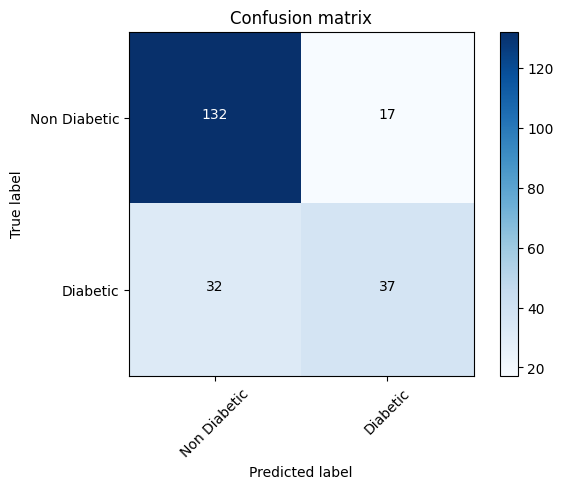

In [167]:
plot_confusion_matrix(confusion, classes=['Non Diabetic', 'Diabetic'], title='Confusion matrix')

In [168]:
#YOUR CODE
# from confusion matrix determine:

# True Positives
tp = 37
# True Negatives
tn = 132
# False Positives
fp = 17
# False Negatives
fn = 32

### 03. Metrics computed from the Confusion Matrix

In [169]:
#Compare the metrics you determined with the output from scikit-learn functions
from sklearn.metrics import recall_score, precision_score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('From sklearn metrics')
print(f'recall: {recall}, precision: {precision}')

print('From my metrics')
print(f'recall: {tp / (tp + fn)}, precision: {tp / (tp + fp)}')

From sklearn metrics
recall: 0.5362318840579711, precision: 0.6851851851851852
From my metrics
recall: 0.5362318840579711, precision: 0.6851851851851852


#### Classification accuracy

In [170]:
#YOUR CODE
# calculate "by hand" and compare with scikit-learn
acc_hand = (tp + tn) / (tp + fp + tn + fn)
acc_sk = accuracy_score(y_test, y_pred)
print(f'hand: {acc_hand}, sk: {acc_sk}')

hand: 0.7752293577981652, sk: 0.7752293577981652


#### Sensitivity/Recall

In [171]:
#YOUR CODE
#calculate "by hand" and compare with scikit-learn
recall_hand = tp / (tp + fn)
recall_sk = recall_score(y_test, y_pred)
print(f'hand: {recall_hand}, sk: {recall_sk}')

hand: 0.5362318840579711, sk: 0.5362318840579711


#### Specificity

In [172]:
#YOUR CODE
# calculate "by hand"
spec_hand = tn / (fp + tn)
print(f'hand: {spec_hand}')

hand: 0.8859060402684564


#### False Positive Rate

In [173]:
#YOUR CODE
# calculate "by hand"
fpr = fp / (fp + tn)
print(f'hand: {fpr}')

hand: 0.11409395973154363


#### Precision

In [174]:
#YOUR CODE
# calculate "by hand" and compare with scikit-learn
prec_hand = tp / (tp + fp)
prec_sk = precision_score(y_test, y_pred)
print(f'hand: {prec_hand}, sk: {prec_sk}')

hand: 0.6851851851851852, sk: 0.6851851851851852


### Adjusting Classification Threshold

In [175]:
#YOUR CODE
# print the first 10 predicted responses
y_pred[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [176]:
#YOUR CODE
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test[:10])

array([[0.63133619, 0.36866381],
       [0.88235372, 0.11764628],
       [0.3207973 , 0.6792027 ],
       [0.37501832, 0.62498168],
       [0.25898686, 0.74101314],
       [0.74183184, 0.25816816],
       [0.75516782, 0.24483218],
       [0.82027372, 0.17972628],
       [0.3801475 , 0.6198525 ],
       [0.669763  , 0.330237  ]])

In [177]:
#YOUR CODE
# store the predicted probabilities for class 1 (diabetic)
class_1_proba = logreg.predict_proba(X_test)[:, 1]
#print(class_1_proba)

(array([33., 44., 37., 34., 16., 13., 10., 18.,  9.,  4.]),
 array([0.04463331, 0.13508658, 0.22553985, 0.31599311, 0.40644638,
        0.49689965, 0.58735292, 0.67780619, 0.76825946, 0.85871273,
        0.949166  ]),
 <BarContainer object of 10 artists>)

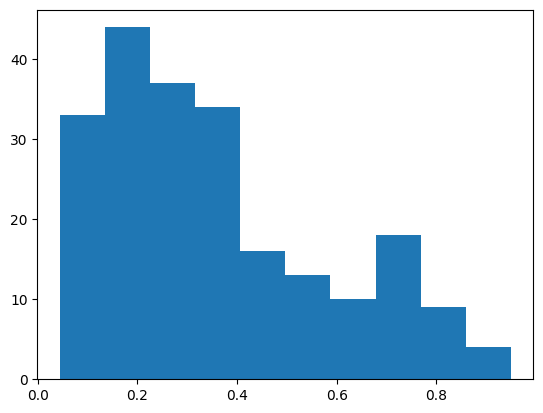

In [178]:
#YOUR CODE
# plot the histogram of predicted probabilities
plt.hist(class_1_proba)

Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [179]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_prob = class_1_proba
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]

In [180]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[132  17]
 [ 32  37]]


In [181]:
#YOUR CODE
# Determine new confusion matrix (threshold of 0.3)
confusion = confusion_matrix(y_test, y_pred_class)
confusion

array([[96, 53],
       [12, 57]])

In [182]:
#YOUR CODE
# for new confusion matrix (threshold of 0.3), determine:

# True Positives
tp = 57
# True Negatives
tn = 96
# False Positives
fp = 53
# False Negatives
fn = 12

In [183]:
#YOUR CODE
# calculate new sensitivity and compare with old
sensi = tp / (tp + fn)
print(f'new: {sensi}, old: {recall_hand}')

new: 0.8260869565217391, old: 0.5362318840579711


In [184]:
#YOUR CODE
# calculate new specificity and compare with old
spec = tn / (fp + tn)
print(f'new: {spec}, old: {spec_hand}')

new: 0.6442953020134228, old: 0.8859060402684564


### 04. ROC Curves and Area Under the Curve (AUC)

In [185]:
from sklearn.metrics import roc_curve, roc_auc_score

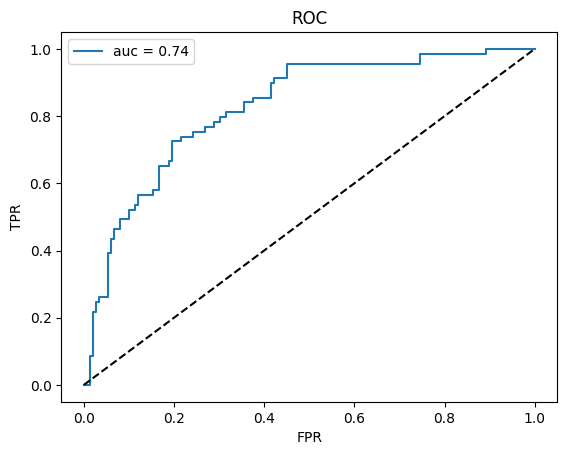

In [193]:
#YOUR CODE
# calculate and plot the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_class)
plt.plot(fpr, tpr, label=f'auc = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()

In [187]:
#YOUR CODE
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    y_pred_class = binarize([y_pred_prob], threshold=threshold)[0]
    confusion = confusion_matrix(y_test, y_pred_class)
    tp = confusion[1, 1]
    tn = confusion[0, 0]
    fp = confusion[0, 1]
    fn = confusion[1, 0]
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    print(f'sensitivity: {sensitivity}, specificity: {specificity}')


In [188]:
evaluate_threshold(0.3)

sensitivity: 0.8260869565217391, specificity: 0.6442953020134228


In [189]:
evaluate_threshold(0.5)

sensitivity: 0.5362318840579711, specificity: 0.8859060402684564


In [190]:
print(roc_auc_score(y_test, y_pred_prob))

0.8268650909444607


In [191]:
#YOUR CODE
# calculate cross-validated AUC (for CV=10)
cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(logreg, X, y, cv=cv)
np.mean(scores)

0.7790525114155251